In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data=pd.read_csv("OPTIDX_BANKNIFTY_CE_01-03-2019_TO_07-03-2019 (1).csv")


data_pe=pd.read_csv("OPTIDX_BANKNIFTY_PE_01-03-2019_TO_07-03-2019 (1).csv")
data_pe.head(1)

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,01-Mar-2019,14-Mar-2019,PE,25000,0.0,0.0,0.0,51.05,0.0,0.15,0,0.0,0.0,0,0,-


In [9]:
data_ce=data.groupby(['Date','Strike Price'],as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})
# data_pe=data_pe.groupby('Date',as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})

data_ce['Date']=pd.to_datetime(data_ce.Date)
# data_ce.sort_values('Date',ascending=False)
data_ce


,Date,Strike Price,Open Int,Change in OI
0,2019-03-01,25000,0,0
1,2019-03-01,25100,0,0
2,2019-03-01,25200,0,0
3,2019-03-01,25300,0,0
4,2019-03-01,25400,0,0
5,2019-03-01,25500,0,0
6,2019-03-01,25600,0,0
7,2019-03-01,25700,0,0
8,2019-03-01,25800,0,0
9,2019-03-01,25900,0,0


In [17]:
data_pe['Date']=pd.to_datetime(data_pe.Date)
data_pe.sort_values('Date',ascending=False)

,Date,Open Int,Change in OI
3,2019-03-07,2373720,1568980
2,2019-03-06,804740,317840
1,2019-03-05,486900,399020
0,2019-03-01,87880,51480


In [18]:
newDS=data_ce.join(data_pe,lsuffix='_CE',rsuffix='_PE').sort_values('Date_CE',ascending=False)
newDS

,Date_CE,Open Int_CE,Change in OI_CE,Date_PE,Open Int_PE,Change in OI_PE
3,2019-03-07,2575060,1474820,2019-03-07,2373720,1568980
2,2019-03-06,1100240,509660,2019-03-06,804740,317840
1,2019-03-05,590580,472980,2019-03-05,486900,399020
0,2019-03-01,117600,92580,2019-03-01,87880,51480


ValueError: x and y must have same first dimension, but have shapes (170,) and (2, 170)

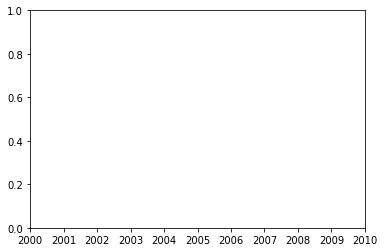

In [22]:


dates = matplotlib.dates.date2num(data_ce['Date'])
plt.plot_date(dates,data_ce['Open Int'],)
# plt.plot_date(dates,newDS['Change in OI_CE'])

# plt.plot_date(dates,newDS['Open Int_PE'])
# plt.plot_date(dates,newDS['Change in OI_PE'])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


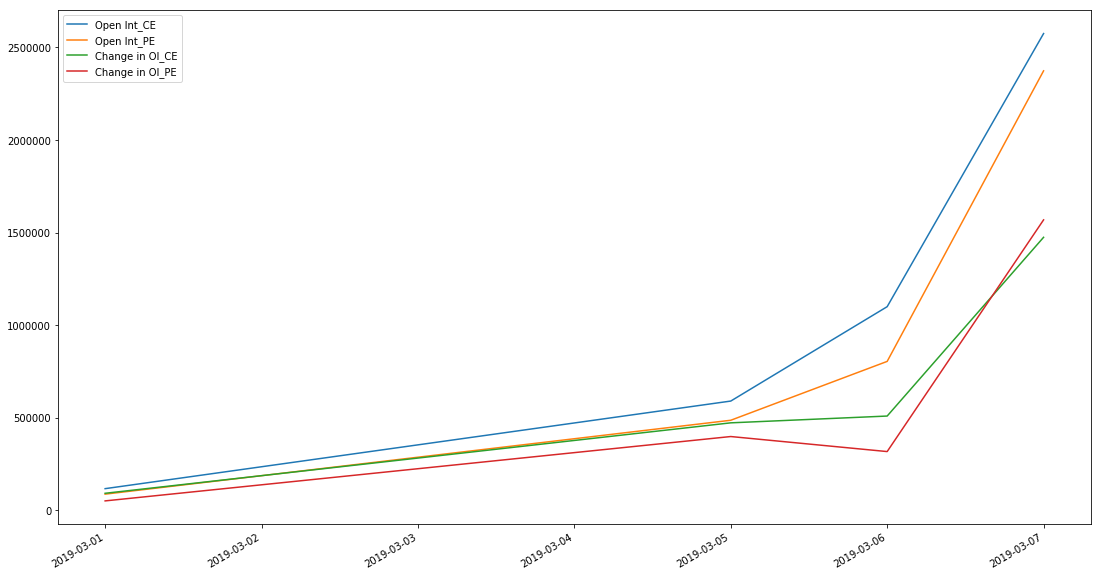

In [20]:
dates = newDS['Date_CE']
# y=newDS['Open Int_CE']
plt.plot(dates,newDS['Open Int_CE'])
plt.plot(dates,newDS['Open Int_PE'])

plt.plot(dates,newDS['Change in OI_CE'])
plt.plot(dates,newDS['Change in OI_PE'])


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

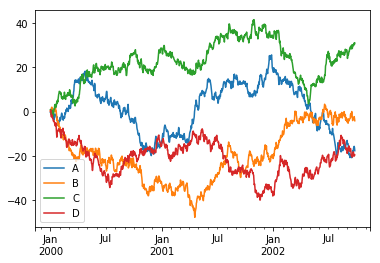

In [29]:
ts = pd.Series(np.random.randn(1000),
          index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4),
                   index=ts.index, columns=list('ABCD'))

df = df.cumsum()

plt.figure();

df.plot();


In [37]:
ts = pd.Series(np.random.randn(1000),
          index=pd.date_range('1/1/2000', periods=1000))
ts
np.random.randn(1000, 4).shape

(1000, 4)